<a href="https://colab.research.google.com/github/adnan-mujagic/steam-recommender-system-using-implicitly-inferred-ratings/blob/main/dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

dataset = pd.read_csv("/content/drive/MyDrive/ML/Steam/steam-200k-with-ratings.csv")

dataset.head()

,user_id,game_name,rating
0,151603712,The Elder Scrolls V Skyrim,1.344707
1,151603712,Fallout 4,2.942794
2,151603712,Spore,1.988526
3,151603712,Fallout New Vegas,1.631365
4,151603712,Left 4 Dead 2,1.606206


In [8]:
grouped = dataset.groupby("game_name").agg(mean_rating = ("rating", "mean"), number_of_ratings = ("rating", "count")).reset_index()

popular_games = grouped.sort_values(by = "number_of_ratings", ascending = False).head(10)

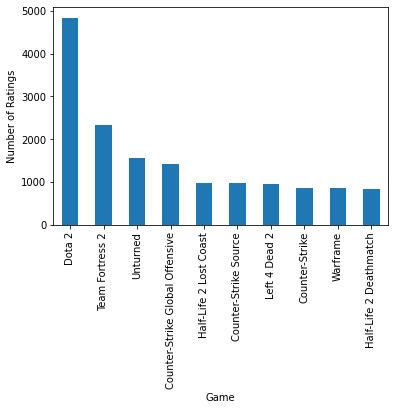

In [14]:
popular_games.plot(x = "game_name", y = "number_of_ratings", kind = "bar", xlabel = "Game", ylabel = "Number of Ratings", legend = None)

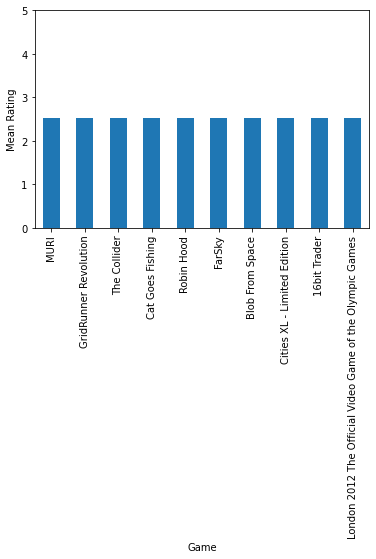

In [29]:
grouped.sort_values(by = "mean_rating", ascending = False).head(10).plot(x = "game_name", y = "mean_rating", kind = "bar", xlabel = "Game", ylabel = "Mean Rating", legend = None, ylim = (0, 5))

The property of the function used to infer the ratings is that the mean rating of every single game is approximately `2.5`.

In [36]:
clean_ds = pd.read_csv("/content/drive/MyDrive/ML/Steam/steam-200k-clean.csv")

clean_ds.head()

,user_id,game_name,hours_played
0,151603712,The Elder Scrolls V Skyrim,0.0
1,151603712,Fallout 4,87.0
2,151603712,Spore,14.9
3,151603712,Fallout New Vegas,12.1
4,151603712,Left 4 Dead 2,8.9


In [37]:
grouped_with_hrs_played = clean_ds.groupby("game_name").agg(mean_hours_played = ("hours_played", "mean"), number_of_ratings = ("hours_played", "count")).reset_index()

In [40]:
most_played_games = grouped_with_hrs_played.sort_values(by = "mean_hours_played", ascending = False).head(20)

most_played_games.head()

,game_name,mean_hours_played,number_of_ratings
1458,Eastside Hockey Manager,1295.0000,1
1606,FIFA Manager 09,411.0000,1
3130,Perpetuum,400.9750,4
1762,Football Manager 2012,385.5725,80
1764,Football Manager 2014,382.1850,80


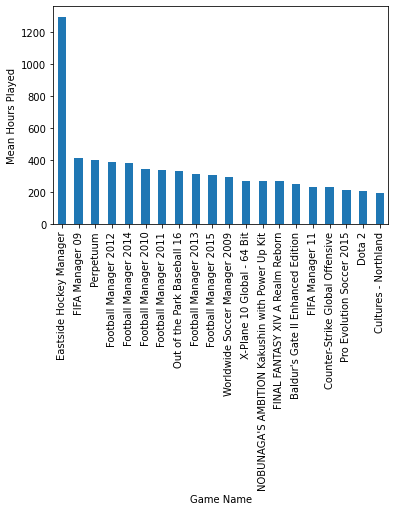

In [41]:
most_played_games.plot(x = "game_name", y = "mean_hours_played", kind = "bar", xlabel = "Game Name", ylabel = "Mean Hours Played", legend = None)